<a href="https://colab.research.google.com/github/rabieessayeh/rabieessayeh-Neaurant_Artificiel_CHATS__Vs__CHIENS/blob/main/Neaurant_Artificiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Neaurant artificiel

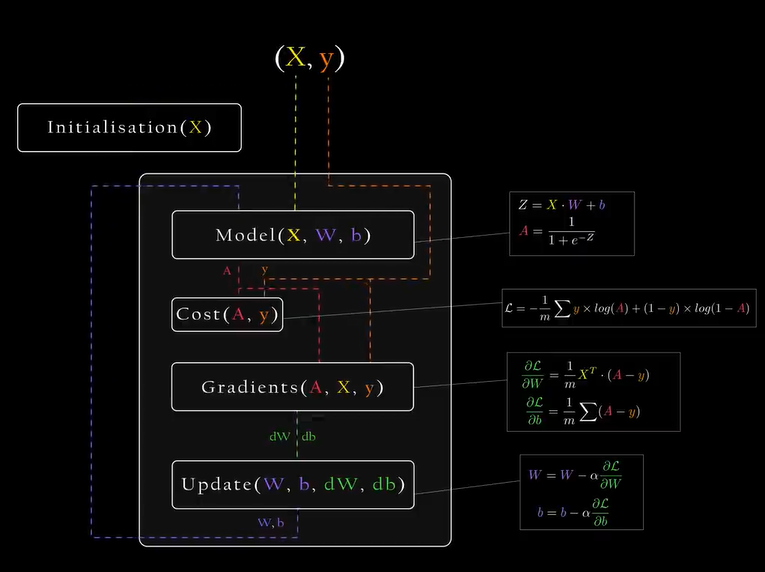

Dimension de x :  (100000, 4)
Dimension de y :  (100000, 1)


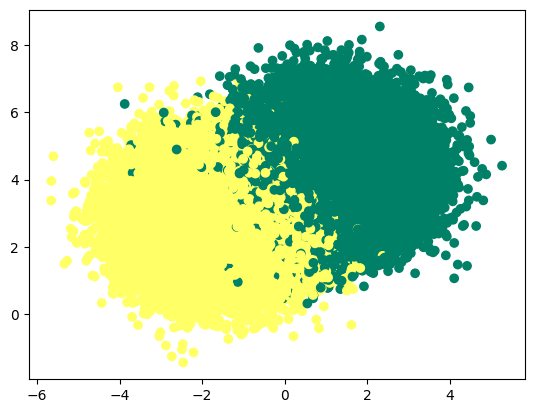

In [ ]:
X, y = make_blobs(n_samples=100000, n_features=4, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print("Dimension de x : ", X.shape)
print("Dimension de y : ", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

In [ ]:
def Initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [ ]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1/(1 +np.exp(-Z))
  return A

In [ ]:
def cout(A, y):
  epsilon = 1e-15
  return 1/len(y) * np.sum(-y*np.log(A + epsilon) -(1-y)*np.log(1-A + epsilon))

In [ ]:
def gradient(A, X, y):
  dw = 1/len(y)*np.dot(X.T, A-y)
  db = 1/len(y)*np.sum(A-y)
  return (dw, db)

In [ ]:
def update(dw, db, W, b, Learning_rate):
  W = W - Learning_rate*dw
  b = b - Learning_rate*db
  return (W, b)

In [ ]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [ ]:
def neaurant_artificiel(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = Initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(cout(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(cout(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradient(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)



##  **APPLICATION:** Chat Vs CHIEN

In [ ]:
# !pip install h5py
import h5py
import numpy as np

def load_data():
    train_dataset = h5py.File('/content/datasetes/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('/content/datasetes/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


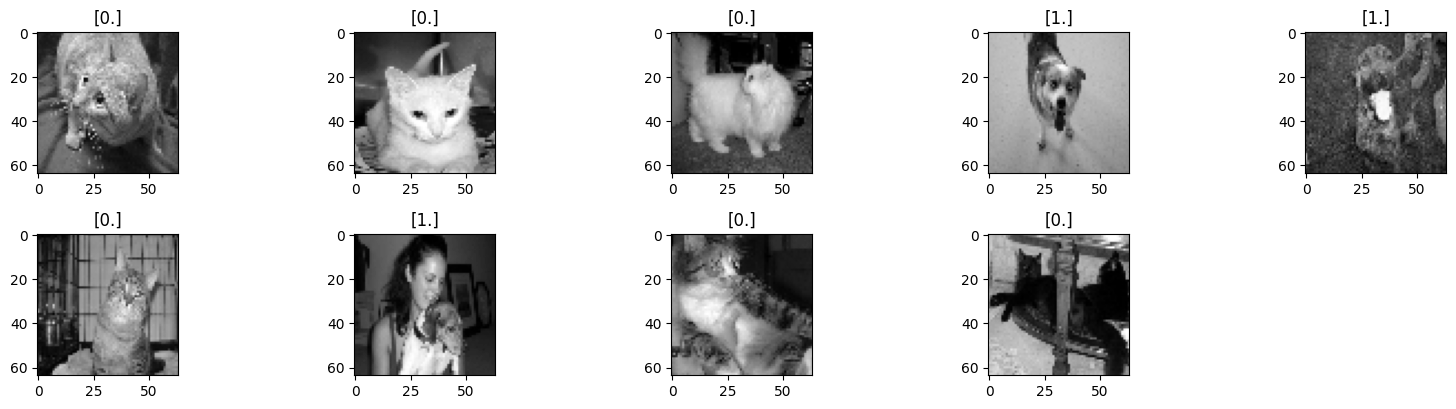

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

# Entrainement du Modele

In [ ]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1)/X_train.max()
X_train_reshape.shape

(1000, 4096)

In [ ]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)/X_test.max()
X_test_reshape.shape

(200, 4096)

100%|██████████| 1000/1000 [00:10<00:00, 94.84it/s]


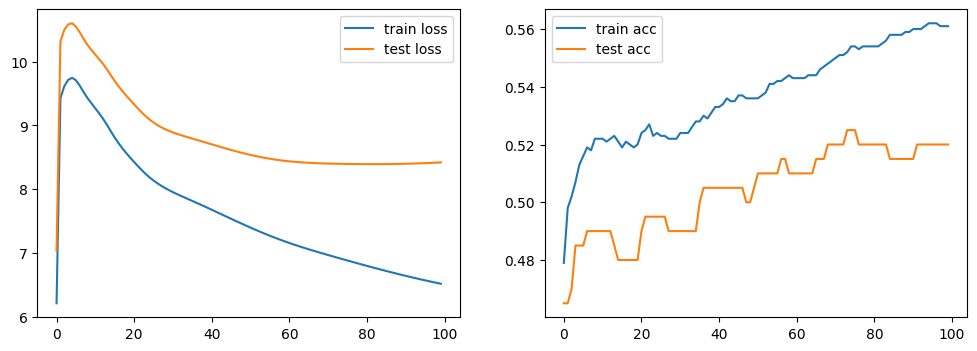

In [ ]:
W, b = neaurant_artificiel(X_train_reshape, y_train, X_test_reshape, y_test, n_iter=1000)